<a href="https://colab.research.google.com/github/veyselalevcan/Time_Series/blob/main/electiricty_consuption_forecast_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install evds --upgrade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from evds import evdsAPI
evds = evdsAPI('J2ua6jVeIF')
veri = evds.get_data(['TP.ELEKTUKETIM.TKT1'], startdate="01-01-2016", enddate="31-08-2023", frequency=5)

In [ ]:
tarih= pd.date_range('01.01.2016', periods= len(veri), freq= 'M')
veri['Tarih'] = tarih
veri.set_index('Tarih', inplace=True)
veri.rename(columns= {'TP_ELEKTUKETIM_TKT1': 'Tuketim'}, inplace=True)
veri

,Tuketim
Tarih,
2016-01-31,7.653446e+05
2016-02-29,7.294195e+05
2016-03-31,7.148575e+05
2016-04-30,7.100608e+05
2016-05-31,7.064614e+05
...,...
2023-04-30,7.915435e+05
2023-05-31,8.397370e+05
2023-06-30,8.279880e+05


In [ ]:
veri.isnull().sum()

Tuketim    0
dtype: int64

In [ ]:
veri= veri.drop('2023-08-31')

<Axes: >

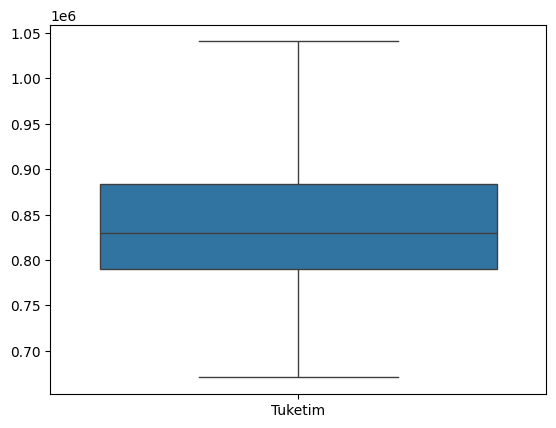

In [ ]:
sns.boxplot(veri, whis=3)

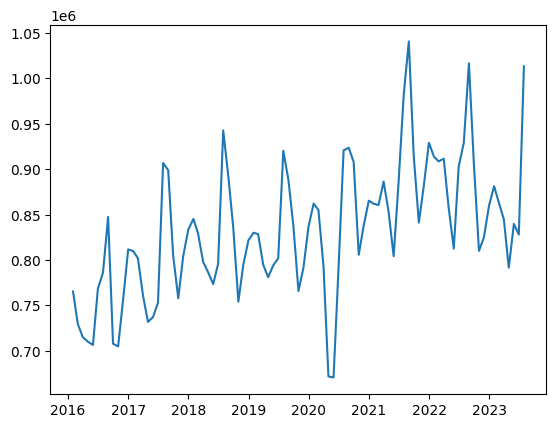

In [ ]:
plt.plot(veri)

## İstatiksel veri testi Trend var mı?

In [ ]:
!pip install pymannkendall

In [ ]:
from pymannkendall import original_test

In [ ]:
mk= original_test(veri)
mk #increasing yukarı yonlu ve p value < 0.05 trend vardır

Mann_Kendall_Test(trend='increasing', h=True, p=1.0757331692090588e-08, z=5.718334347614908, Tau=0.40757020757020757, s=1669.0, var_s=85085.0, slope=1595.5230399999978, intercept=757660.1007000002)

## Mevsimsellik Testi

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

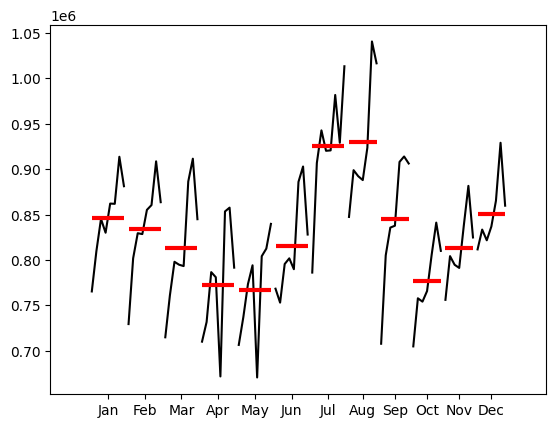

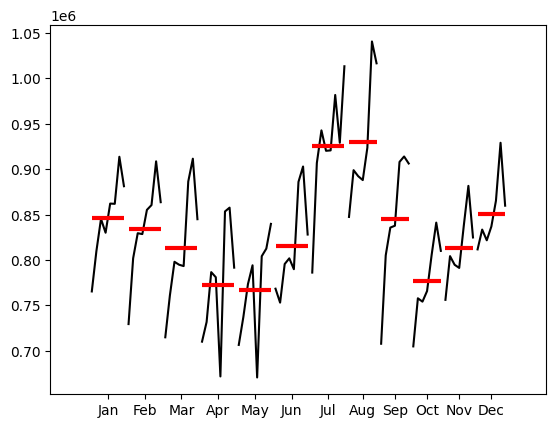

In [ ]:
month_plot(veri) # yaz mevsiminde artısı gorebiliriz, klima etkisi

## Trend var Mevsimsellik var Holdwinter ile tahminleme yapacagız
 son yılı ayırıp kalanları train edecegim. 12 donemlık tahmını bunlarla kıyaslayalım


In [ ]:
veri2= veri.iloc[:-12]
veri2

,Tuketim
Tarih,
2016-01-31,765344.606452
2016-02-29,729419.478621
2016-03-31,714857.482581
2016-04-30,710060.789333
2016-05-31,706461.367097
...,...
2022-03-31,911505.557742
2022-04-30,857622.922333
2022-05-31,812516.100645


In [ ]:
sonyıl= veri.iloc[-12:] # son seneyei ayrı tutalım
sonyıl

,Tuketim
Tarih,
2022-08-31,1.016522e+06
2022-09-30,9.062296e+05
2022-10-31,8.100255e+05
2022-11-30,8.247804e+05
2022-12-31,8.597678e+05
2023-01-31,8.812087e+05
2023-02-28,8.636199e+05
2023-03-31,8.448948e+05
2023-04-30,7.915435e+05


In [ ]:
# veri2 ile model kur train ile predict yap sonyıl ile kıyasla Hiperparametre optimizasonu ile

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
parametreler= { 'trend': ['add', 'mul'],
               'damped_trend': ['True', 'False'],
                'seasonal': ['add', 'mul'],
                'smoothing_level':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                'smoothing_trend':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                'smoothing_seasonal': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                'damping_trend': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

#toplamsal ve carpımsal trend, fit icin metots kısmından aldık statsmodelden

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
pg= list(ParameterGrid(param_grid= parametreler)) #tum kombinasyonlarını yaptı bu aralıklarda
pg

[{'damped_trend': 'True',
  'damping_trend': 0.1,
  'seasonal': 'add',
  'smoothing_level': 0.1,
  'smoothing_seasonal': 0.1,
  'smoothing_trend': 0.1,
  'trend': 'add'},
 {'damped_trend': 'True',
  'damping_trend': 0.1,
  'seasonal': 'add',
  'smoothing_level': 0.1,
  'smoothing_seasonal': 0.1,
  'smoothing_trend': 0.1,
  'trend': 'mul'},
 {'damped_trend': 'True',
  'damping_trend': 0.1,
  'seasonal': 'add',
  'smoothing_level': 0.1,
  'smoothing_seasonal': 0.1,
  'smoothing_trend': 0.2,
  'trend': 'add'},
 {'damped_trend': 'True',
  'damping_trend': 0.1,
  'seasonal': 'add',
  'smoothing_level': 0.1,
  'smoothing_seasonal': 0.1,
  'smoothing_trend': 0.2,
  'trend': 'mul'},
 {'damped_trend': 'True',
  'damping_trend': 0.1,
  'seasonal': 'add',
  'smoothing_level': 0.1,
  'smoothing_seasonal': 0.1,
  'smoothing_trend': 0.3,
  'trend': 'add'},
 {'damped_trend': 'True',
  'damping_trend': 0.1,
  'seasonal': 'add',
  'smoothing_level': 0.1,
  'smoothing_seasonal': 0.1,
  'smoothing_trend'

In [ ]:
df= pd.DataFrame(pg) # 7 hiperparametrenin tum kombinasyonlarını tablo olarak gorelim
df

,damped_trend,damping_trend,seasonal,smoothing_level,smoothing_seasonal,smoothing_trend,trend
0,True,0.1,add,0.1,0.1,0.1,add
1,True,0.1,add,0.1,0.1,0.1,mul
2,True,0.1,add,0.1,0.1,0.2,add
3,True,0.1,add,0.1,0.1,0.2,mul
4,True,0.1,add,0.1,0.1,0.3,add
...,...,...,...,...,...,...,...
52483,False,0.9,mul,0.9,0.9,0.7,mul
52484,False,0.9,mul,0.9,0.9,0.8,add
52485,False,0.9,mul,0.9,0.9,0.8,mul
52486,False,0.9,mul,0.9,0.9,0.9,add


##Hata Metrigi

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
rmse= []
for i in range(0, len(df)):
  tes= ExponentialSmoothing(veri2, trend= df.iloc[i]['trend'],
                            damped_trend= df.iloc[i]['damped_trend'],
                            seasonal= df.iloc[i]['seasonal'],
                            seasonal_periods= 12)
  model= tes.fit(smoothing_level = df.iloc[i]['smoothing_level'],
                 smoothing_trend = df.iloc[i]['smoothing_trend'],
                 smoothing_seasonal = df.iloc[i]['smoothing_seasonal'],
                 damping_trend = df.iloc[i]['damping_trend'],
                 optimized= False)
  tahmin= model.fittedvalues

  rmse.append(np.sqrt(mean_squared_error(veri2, tahmin)))

df['RMSE']=rmse
df.sort_values(by= 'RMSE')

  #Yukarda olusturaln df ıcınde her elamnı gezerek dongu kur,
  #tes ile model kur veri2 data setimle, trend sutununa gıt oranın elemanlarını isle,
  # aylık veri calıstıgımız ıcın seasinal period 12 yaptok
  # tes yapısını fit edeip model kuralım

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred f

,damped_trend,damping_trend,seasonal,smoothing_level,smoothing_seasonal,smoothing_trend,trend,RMSE
26893,False,0.1,add,0.5,0.1,0.1,mul,3.160205e+04
649,True,0.1,add,0.5,0.1,0.1,mul,3.160205e+04
26892,False,0.1,add,0.5,0.1,0.1,add,3.160360e+04
648,True,0.1,add,0.5,0.1,0.1,add,3.160360e+04
503,True,0.1,add,0.4,0.1,0.9,mul,3.160725e+04
...,...,...,...,...,...,...,...,...
23326,True,0.8,mul,0.9,0.9,0.9,add,4.958009e+05
26243,True,0.9,mul,0.9,0.9,0.9,mul,5.484591e+05
52487,False,0.9,mul,0.9,0.9,0.9,mul,5.484591e+05
26242,True,0.9,mul,0.9,0.9,0.9,add,5.945241e+06


In [ ]:
tes= ExponentialSmoothing(veri2, trend= 'mul',
                            damped_trend= True,
                            seasonal= 'add',
                            seasonal_periods= 12)
model= tes.fit(smoothing_level = 0.5,
                 smoothing_trend = 0.1,
                 smoothing_seasonal = 0.1,
                 damping_trend = 0.1,
                 optimized= False)
gecmis= model.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


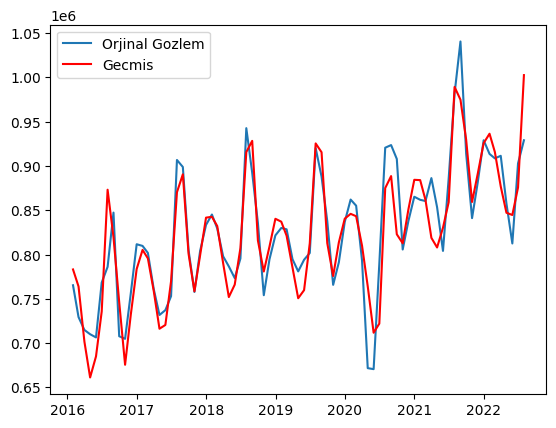

In [ ]:
plt.plot(veri2, label= 'Orjinal Gozlem')
plt.plot(gecmis, label='Gecmis', color= 'red')
plt.legend()
plt.show()

<ipython-input-44-e361d95be91a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonyıl['Tahmin']= tahmin


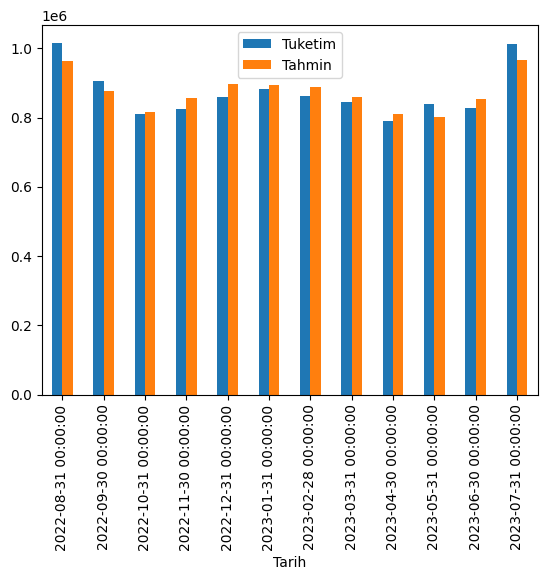

In [ ]:
tahmin= model.forecast(12)
sonyıl['Tahmin']= tahmin
sonyıl.plot(kind='bar')
plt.show()